# Planteamiento del problema


En una empresa de correspondencia se decide automatizar las 10 zonas que se encuentran disponibles para el envío de los paquetes, estos paquetes están marcados del 0 a 9 y cada número pertenece a una zona respectiva. Los clientes lo que hacen antes de enviar el paquete a la empresa de correspondecia es escribir el número de la zona a la que desean que sea enviado su paquete, siendo así necesario que una red neuronal se deba entrenar para que reconozca los patrones que pueden tener estos números que escriben nuestros clientes. 
Se plantea la automatización de este proceso mediante un identificador que permita analizar los números que colocan los clientes a la zona en que será enviado posteriormente el paquete. En el momento se encuentran 5 operarios realizando esta clasificación de manera manual, por lo tanto, la reducción que se puede dar en costos como en los errores será significativa si se logra dar con unos buenos resultados en el desarrollo del modelo, a su vez se mejorarían considerablemente los tiempos de la clasificación con respecto al trabajo realizado por los operarios. 
 


# Descripción de los datos

In [1]:
### Carga de paquetes y librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import tensorflow as tf #Framework para deep learning
from tensorflow import keras #API que contiene la mayoría de funciones para las RN
from tensorflow.keras import regularizers
from keras_tuner.tuners import RandomSearch

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape



KeyboardInterrupt: 

Tamaño de las imagenes en el dataset, 60000 ejemplos con una matriz de 28 x 28 pixeles

In [ ]:
np.unique(y_train, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

Categorías en el dataset, cantidad de datos por categoría.

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Observación cero


0

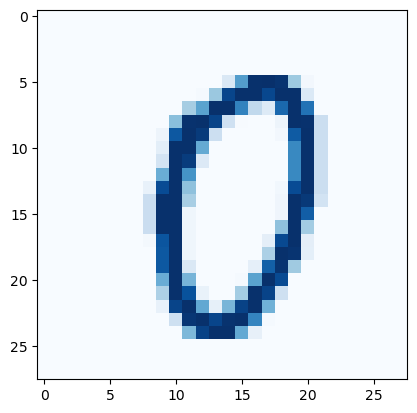

In [ ]:
### Visualización de algunos datos
plt.imshow(x_train[1000], cmap='Blues') #cmap en gray porque esta en escala de grises, observación 1000
y_train[1000] #Etiqueta de la imagen

Primero vamos a probar el modelo de Random Forest, se deben aplanar las matrices para que el modelo pueda entender los datos. 
Además, estandarizamos los datos.


In [ ]:
x_train2 = x_train/255 # Valores entre 0 y 1
x_test2 = x_test/255
x_train2.shape, x_test2.shape
fxc=int(x_train2.shape[1])*int(x_train2.shape[2])
fxc


784

Aplanamos la matriz

In [ ]:
x_trainr = x_train2.reshape(x_train2.shape[0], fxc)
x_testr = x_test2.reshape(x_test2.shape[0], fxc)

x_trainr.shape  

(60000, 784)

Se pasó de una matriz multidimensional a una matriz de 2x2.

# RANDOM FOREST CLASSIFIER

Se construirá el modelo con un mínimo de 10 muestras requeridos para formar una hoja y además se van a realizar solo 10 árboles de decisión.

In [ ]:
modelo1 = RandomForestClassifier(min_samples_leaf=10, n_estimators=10, random_state=42)
modelo1.fit(x_trainr, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=10, random_state=42)

Se crea la instancia y se ajustan los datos.


In [ ]:
# DESEMPEÑO
pred_train_mod1 = modelo1.predict(x_trainr) ##predicciones en entrenamiento
pred_test_mod2 = modelo1.predict(x_testr) ##predicciones en test

print(metrics.classification_report(y_train, pred_train_mod1)) #métricas en entrenamiento
print(metrics.classification_report(y_test, pred_test_mod2 )) #métricas en evaluación

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5923
           1       0.98      0.99      0.99      6742
           2       0.96      0.97      0.96      5958
           3       0.97      0.95      0.96      6131
           4       0.97      0.97      0.97      5842
           5       0.96      0.96      0.96      5421
           6       0.97      0.98      0.98      5918
           7       0.97      0.97      0.97      6265
           8       0.96      0.96      0.96      5851
           9       0.95      0.95      0.95      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.94      0.94      0.94      1032
           3       0.94 

En términos del recall predice mejor algunos dígitos que otros, entre los valores donde más se equivoca están el tres y el nueve. Teniendo en cuenta una medida más armónica como el F1-score todos los valores se encuentran por encima del 95%.

Evaluando la métrica de exactitud en el modelo, se tiene que para el entrenamiento el accuracy es del 97% y para la validación un valor del 95%, por lo tanto, se tienen buenas métricas, además no se evidencia sobreajuste. Finalmente, este tipo de modelo deja en el camino características propias de la imagen, por lo tanto, más adelante se consideran otros modelos que pueden responder mejor a cambios en las imágenes de entrada y que además aprenden otros patrones.

Matriz de confusión

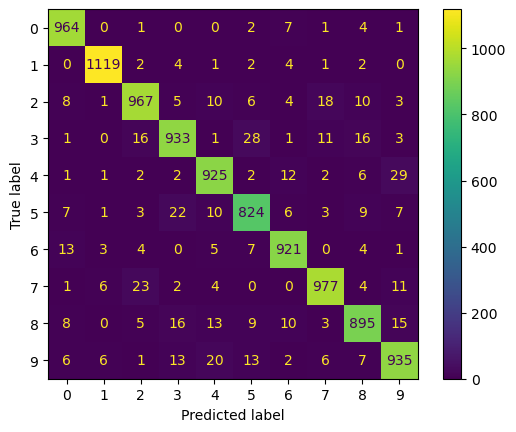

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_test_mod2 ) # evaluación
matriz = metrics.ConfusionMatrixDisplay(cm) # Matriz datos de validación
matriz.plot()

Como se observa en la matriz de confusión los valores en donde más se equivocó el modelo fueron los siguientes: confunde el dos con el 7, el 3 con el 2, con el 5 y con el 8, el 4 con el 9, el 5 con el 3, el 7 con el 2, el 8 con el 3 y con el 9, el 9 con el 3,4,5. Es importante recalcar que a este tipo de modelos solo se le ingreso las matrices aplanadas (vector de 728 características) por lo que al ver una nueva imagen en donde el número se distribuya diferente, en tamaño, definición y demás características, no es capaz de predecir correctamente el dígito.

# ANN 1

Se crea la primera red neuronal con una sola capa oculta con una función de activación Relu, la cual siempre da valores positivos y cero cuando son negativos. 

In [ ]:
ann1 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[x_train2.shape[1], x_train2.shape[2]]), #Capa de entrada, flatten aplana la matriz
    keras.layers.Dense(128, activation='relu'), #activacion de las neuronas con Relu, 128 neuronas en la primera capa oculta, siempre valores positivos, negativos cero.
    keras.layers.Dense(10, activation='softmax')] #activacion para capa de salida con softmax
)
display(ann1.count_params())
display(60000/ann1.count_params())

101770

0.5895647047263437

Se tienen 101770 parámetros en el modelo, además un grado de libertad de 0.58, esta lejano a uno, por lo que se puede mejorar la arquitectura de la red.

Resumen

In [ ]:
print(ann1.summary())# resumen

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Se tiene una capa de entrada de 784 neuronas, las cuales se generaron al aplanar las imágenes de 28x28, recordemos que las redes neuronales clásicas no reciben matrices multidimensionales. Se tiene una capa oculta con 128 neuronas donde se deben estimar 100480 parámetros y, finalmente, la capa de salida con 10 neuronas y 1290 parámetros para estimar.

Compilación

In [ ]:
# Compilación ANN ( la compilación es lo mismo que entrenar )
ann1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #El optimizador es para que los parametros de la red se ajusten de la mejor forma, luego función de perdida, y finalmente la metrica.
modelo2=ann1.fit(x_train2, y_train, epochs=10, validation_data=(x_test2, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0952 - val_accuracy: 0.9785
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.1004 - val_accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0890 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.1069 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1091 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.1076 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0989 - val_accuracy:


Con las 10 epoch anteriores se logró un accuracy del 98,0 %, es un buen valor para la primera red construida, luego se comparará con los demás modelos.


En cuanto a los gráficos, la curva de error en el entrenamiento está decreciendo a medida que van aumentando las epochs, y probablemente esta métrica siga disminuyendo. Mientras que la curva de error en la validación empieza a tener un comportamiento algo errático al experimentar incluso un leve aumento luego de la epoch 6. Además, se logra presenciar una diferencia significativa entre ambas curvas, siendo cercana al 10% en el epoch 10, lo cual nos puede dar a entender que hay presencia de sobre ajuste. Similar conclusión puede dar el gráfico del accuracy, en donde hay cerca de 3 puntos porcentuales de diferencia y los datos de validación también presente un comportamiento algo errático. 



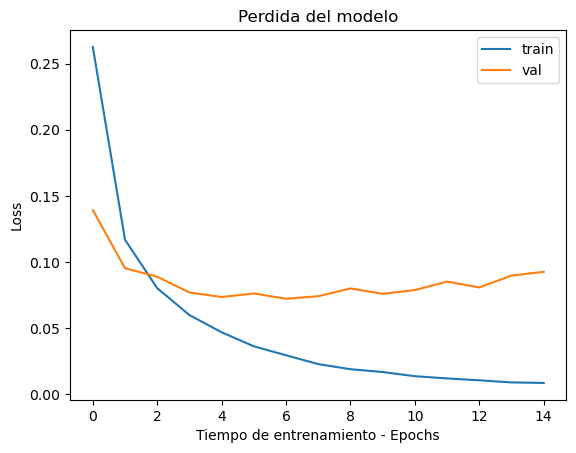

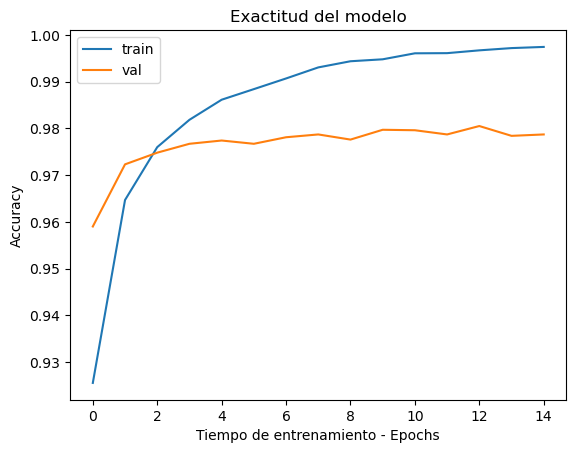

In [ ]:
### Visualización de las curvas de error
plt.plot(modelo2.history['loss'])
plt.plot(modelo2.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo2.history['accuracy'])
plt.plot(modelo2.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


# ANN 2 



En este modelo de red neuronal se decide cambiar la función de activación a tanh en la capa oculta, la cual produce valores entre -1 a 1, también se decide dejar una capa y observar si sus métricas pueden llegar a comportarse de mejor manera.


In [ ]:
ann2 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[x_train2.shape[1], x_train2.shape[2]]), #Capa de entrada, flatten aplana la matriz
    keras.layers.Dense(128, activation='tanh'), #activacion de las neuronas con Relu, 128 neuronas en la primera capa oculta, siempre valores positivos, negativos cero.
    keras.layers.Dense(10, activation='softmax')] #activacion para capa de salida con softmax
)
display(ann2.count_params())
display(60000/ann2.count_params())

101770

0.5895647047263437

Se tiene un total de 101770 parámetros a estimar y se tiene un grado de libertado regular, parecido al anterior, indicando que se puede mejorar el modelo.

In [ ]:
print(ann2.summary())# resumen

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Se tiene una capa de entrada de 784 neuronas las cuales se generaron al aplanar las imágenes de 28x28, recordemos que las redes neuronales clásicas no reciben matrices multidimensionales. Se tiene una capa oculta con 128 neuronas donde se deben estimar 100480 parámetros y finalmente la capa de salida con 10 neuronas y 1290 parámetros para estimar.

Compilación

In [ ]:
# Compilación ANN ( la compilación es lo mismo que entrenar )
ann2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #El optimizador es para que los parametros de la red se ajusten de la mejor forma, luego función de perdida, y finalmente la metrica.
modelo3=ann2.fit(x_train2, y_train, epochs=10, validation_data=(x_test2, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2873 - accuracy: 0.9176 - val_loss: 0.1717 - val_accuracy: 0.9498
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1371 - accuracy: 0.9605 - val_loss: 0.1161 - val_accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0939 - accuracy: 0.9726 - val_loss: 0.0990 - val_accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0683 - accuracy: 0.9802 - val_loss: 0.0835 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0518 - accuracy: 0.9852 - val_loss: 0.0838 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0396 - accuracy: 0.9889 - val_loss: 0.0772 - val_accuracy: 0.9754
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0305 - accuracy: 0.9914 - val_loss: 0.0771 - val_accuracy

Con las 10 epoch anteriores se logró un accuracy del 97,8 %, es un buen valor para la primera red construida, finalmente este modelo en la validación fue un poco peor que el anterior, sin embargo, el valor está muy cerca.

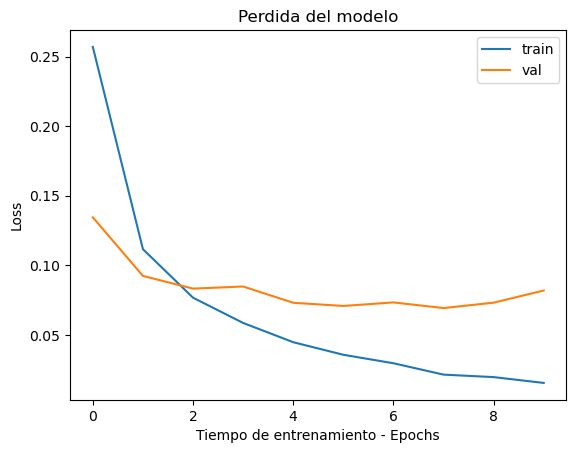

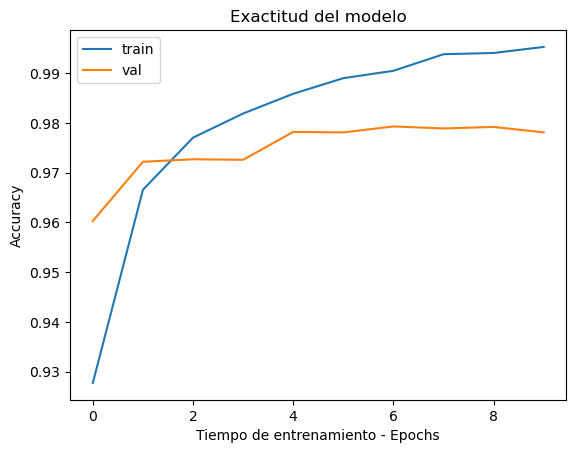

In [ ]:
### Visualización de las curvas de error
plt.plot(modelo2.history['loss'])
plt.plot(modelo2.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo2.history['accuracy'])
plt.plot(modelo2.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


En el gráfico anterior se puede observar el mismo comportamiento de las curvas de error tanto para entrenamiento como para validación e igualmente el mismo comportamiento del accuracy, tanto para entrenamiento y validación que el modelo anterior el cual tenía una activación en la capa oculta tipo Relu, es decir, que al realizar este cambio en la activación no se obtienen mejoras, pues si vamos al detalle se desmejoran los resultados en una cantidad mínima.

# ANN3 (con activación Relu y Tanh)




En esta arquitectura se busca combinar las arquitecturas anteriores, es decir se van implementar dos capas ocultas en donde la primera tiene 128 neuronas con una activación Relu y la segunda capa oculta tiene 64 neuronas con una activación Tanh.


In [ ]:
ann3 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[x_train2.shape[1], x_train2.shape[2]]), #Capa de entrada, flatten aplana la matriz
    keras.layers.Dense(128, activation='relu'), #activacion de las neuronas con Relu, 128 neuronas en la primera capa oculta, siempre valores positivos, negativos cero.
    keras.layers.Dense(64, activation='tanh'), #activacion de las neuronas con tanh, 64 neuronas en la primera capa oculta.
    keras.layers.Dense(10, activation='softmax')] #activacion para capa de salida con softmax
)
display(ann3.count_params())
display(60000/ann3.count_params())

109386

0.5485162635072129

Para este caso no se aumentan de forma drástica los parámetros a estimar, se tiene un total de 109386, además un grado de libertad de 0.54, un valor peor que los modelos anteriores más simples.



Resumen

In [ ]:
print(ann3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Se tiene una capa de entrada de 784 neuronas las cuales se generaron al aplanar las imágenes de 28x28. Se tiene una capa oculta con 128 neuronas donde se deben estimar 100480 parámetros, luego otra capa oculta con 64 neuronas y donde se deben estimar 8256 parámetros. Finalmente, la capa de salida con 10 neuronas y 1290 parámetros para estimar.

Compilación y entrenamiento

In [ ]:
# Compilación ANN ( la compilación es lo mismo que entrenar )
ann3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #El optimizador es para que los parametros de la red se ajusten de la mejor forma, luego función de perdida, y finalmente la metrica.
modelo4=ann3.fit(x_train2, y_train, epochs=10, validation_data=(x_test2, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0160 - accuracy: 0.9945 - val_loss: 0.0800 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0897 - val_accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.0908 - val_accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0941 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0862 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0908 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0912 - val_ac

Este modelo que tiene una capa de más que los modelos anteriores y en donde se mezclan las dos activaciones vistas anteriormente, se tienen un accuracy de 97,7%, el cual es bueno, pero no mejor que los anteriores modelos. Por lo que a primera impresión sin optimizar la red se tiene concluye que mayor complejidad en la arquitectura en este caso no mejora los resultados, solo está aumentando la demanda de la capacidad de la máquina.

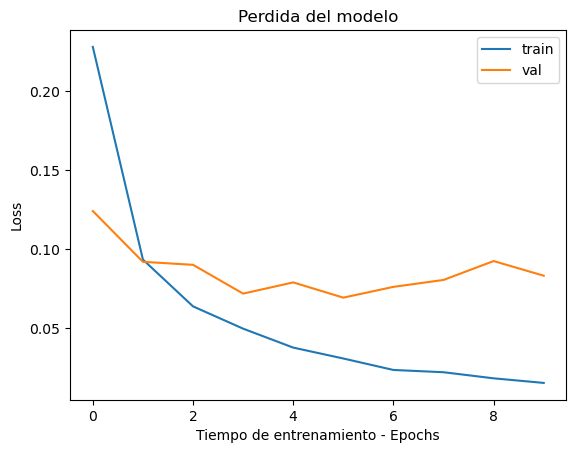

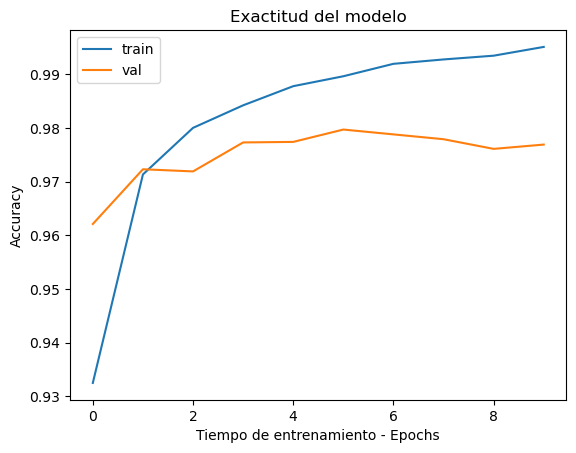

In [ ]:
### Visualización de las curvas de error
plt.plot(modelo4.history['loss'])
plt.plot(modelo4.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo4.history['accuracy'])
plt.plot(modelo4.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


En la curva de error del modelo se observa en el train que si aumentamos más epoch puede disminuir un poco más el error antes de estabilizarse, en el test se ve un comportamiento errático en donde la tendencia de la curva no disminuye. En la exactitud del modelo en el train se tiene un comportamiento similar al de la función de pérdida, en donde todavía no se ha estabilizado el accuracy por lo que podría mejorar, en el test se observa un comportamiento menos erratico que en la curva de error, en este caso el accuracy se estabiliza en el epoch tres aproximadamente. Finalmente, se observa que se puede presentar sobreajuste. 

# ANN4 - Regularización de una red neuronal

Se regulariza para disminuir el poco sobreajuste que presentó el modelo anterior, en este caso se aplica el método para regularizar con un factor L=0.01 que viene por defecto, en este caso se le hace a ambas capas ocultas y se elige el L2 ya que penaliza la función de pérdida, lo que permite limitar la complejidad del modelo y prevenir el sobreajuste.

In [ ]:
ann4 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[x_train2.shape[1], x_train2.shape[2]]), #Capa de entrada, flatten aplana la matriz
    keras.layers.Dense(128, activation='relu', kernel_regularizer= regularizers.L2()), #factor de regularización 0.01, es el que esta igual por defecto
    keras.layers.Dense(64, activation='tanh', kernel_regularizer= regularizers.L2() ), #factor de regularización 0.01, es el que esta igual por defecto
    keras.layers.Dense(10, activation='softmax')] #activacion para capa de salida con softmax
)
display(ann4.count_params())
display(60000/ann4.count_params())

109386

0.5485162635072129

Se tiene en total 109386 parámetros para estimar y un grado de libertad 0.54, parecido al modelo anterior sin regularizar.

Compilacíon y entrenamiento

In [ ]:
# Compilación ANN ( la compilación es lo mismo que entrenar )
ann4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #El optimizador es para que los parametros de la red se ajusten de la mejor forma, luego función de perdida, y finalmente la metrica.
modelo5=ann4.fit(x_train2, y_train, epochs=10, validation_data=(x_test2, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.7524 - accuracy: 0.9010 - val_loss: 0.4476 - val_accuracy: 0.9367
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4471 - accuracy: 0.9327 - val_loss: 0.3938 - val_accuracy: 0.9468
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3924 - accuracy: 0.9405 - val_loss: 0.3759 - val_accuracy: 0.9436
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3589 - accuracy: 0.9446 - val_loss: 0.3285 - val_accuracy: 0.9513
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3346 - accuracy: 0.9481 - val_loss: 0.3089 - val_accuracy: 0.9561
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3208 - accuracy: 0.9507 - val_loss: 0.2845 - val_accuracy: 0.9591
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3106 - accuracy: 0.9510 - val_loss: 0.3056 - val_ac

Este modelo que es igual al modelo anterior se regularizó con el L2 en ambas capas ocultas, se tiene un accuracy de 95,6%, el cual es bueno, pero no mejor que el anterior modelo sin regularizar. Por lo que a primera impresión sin optimizar la red se concluye que hay mayor complejidad en la arquitectura, en este caso no se mejoran los resultados, solo se está aumentando la demanda de la capacidad de la máquina.

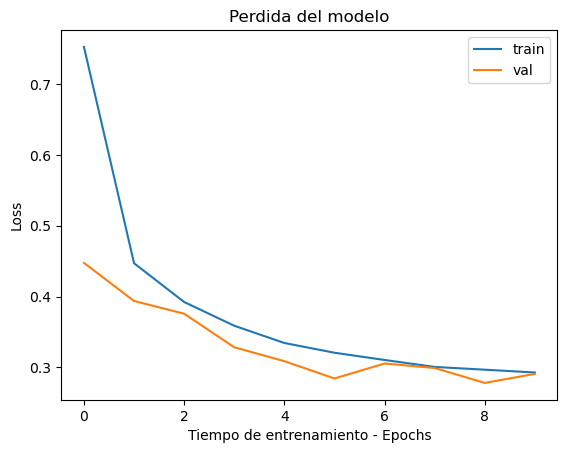

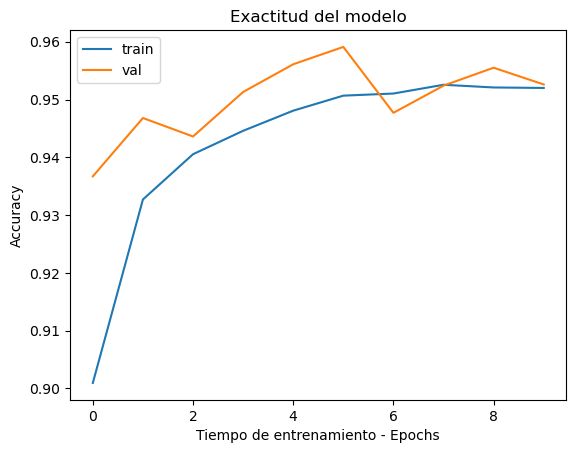

In [ ]:
### Visualización de las curvas de error
plt.plot(modelo5.history['loss'])
plt.plot(modelo5.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo5.history['accuracy'])
plt.plot(modelo5.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()



La regularización ayudó a cerrar la brecha en la curva de error y en la curva del accuracy en este último modelo. Al penalizar los pesos grandes de la red mejora el rendimiento del modelo, sin embargo, el valor del accuracy en general disminuye tanto en entrenamiento y en validación, lo que originó el cierre de la brecha, ya que en entrenamiento desmejoró en mayor medida. Hay que tener en cuenta que la exactitud para la curva de test tiene un comportamiento errático y se pueden realizar cambios en la arquitectura de la red para evitar estos comportamientos. Por último, aproximadamente en el epoch 8 el error y el accuracy se estabilizan.

# ANN5 - Optimización de una red neuronal

Se procede a realizar una búsqueda de valores de los hiperparámetros para observar si con la búsqueda aleatoria, se puede reducir el overfitting en el modelo y con eso observar un mejor desempeño.


Se define el hyper model, este modelo de hiperparametros nos permite definir la estructura de la red neuronal, donde se pueden definir qué elementos el tuneador de keras debe de tunear.


Para esta arquitectura se tienen el mismo número de capas y las mismas activaciones vistas en el modelo anterior. Se va a tener una capa de entrada la cual aplana los datos, luego se define la primera capa oculta en la cual se optimiza el hyperparametro de número de redes neuronales, como vemos se define por medio de keras "hp.int" el rango en donde va a variar este valor y el número de saltos que puede dar, para esta primera capa oculta se varía entre 16 y 512 con un salto de 32. Para la segunda capa oculta se eligió un rango entre 8 y 512 neuronas con salto de 32. Finalmente, se tiene la capa de salida con 10 neuronas. Por último, se define por fuera el learning_rate que a través de Keras por medio de hp.choice permite definir un rango, en este caso la lista de valores son [0.1, 0.01, 0.001, 0.0001, 0.00001]. Para terminar, se compila el modelo que al igual que todos los modelos vistos solo se considera el accuracy.

In [ ]:
### Definición del Hyper model, indica al tuneador donde debe realizar la busqueda.
def build_model(hp): #El tuneador pasa el parametro hp, que son los hyperparametros que se desean tunear.
    model = keras.Sequential()  #creación de objeto
    model.add(keras.layers.Flatten(input_shape=(28,28))) #Capa de entrada

    # Defenición de la primera capa oculta con ajuste de hiperparámetros
    # Elegir el valor óptimo entre 16 - 512 neuronas
    hp_units_1 = hp.Int('units_1', min_value=16, max_value=512, step=32) #Primer hyperparametro que se va a tunear, se da nombre y rango, step= pasos en que se varia
    model.add(keras.layers.Dense(units=hp_units_1, activation='relu')) #Primera capa oculta, se define la grilla de busqueda y se defune la función de activación.

    # Defenición de la segunda capa oculta con ajuste de hiperparámetros
    # Elegir el valor óptimo entre 8 - 512 neuronas
    hp_units_2 = hp.Int('units_2', min_value= 8, max_value=512, step=32) #Segundo hyperparametros que se va a tunear
    model.add(keras.layers.Dense(units=hp_units_2, activation='tanh')) #Segunda capa oculta

    # Definición de la capa de salida
    model.add(keras.layers.Dense(10, activation='softmax')) #Capa de salida con activación softmax, en este caso no se tunea, ya que las clases de salida son fijas.

    # Definición de la tasa de aprendizaje del optimizador
    # Elegir el valor óptimos entre 0.1, 0.01, 0.001, 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001, 0.00001]) #tercer hyperparametro a tunear, por defecto se tiene 0.01
    model.compile(  #se define el compilador
        optimizer = keras.optimizers.Adam(learning_rate= hp_learning_rate), #optimzidor adam, se setea el learning rate porque se va a tunear.
        loss = 'sparse_categorical_crossentropy', # función de perdida
        metrics = ['accuracy'] #Metricas
    )

    return model


Finalmente, se tiene la arquitectura de la red, son tres hyperparametros que se van a tunear, las neuronas de las capas ocultas y el learning rate.


En el tuner se utiliza el método de búsqueda random search. Los valores para el máximo de combinaciones y para los entrenamientos por combinación son bajos porque está tardando mucho tiempo en optimizar.

In [ ]:
### Definción del tuner
tuner = RandomSearch( #Recibe 5 argumentos
    build_model, #funcion que construye el modelo que se va a tunear
    objective= 'val_accuracy', #se maximiza el accuracy con los datos de test
    max_trials=6, #cuantas combinaciones diferentes de hyperparametros se van probar en el proceso de busqueda
    executions_per_trial= 3, #cuantos entrenamientos se van a realizar de la red neuronal por cada intento o combinacion de hyperparametros
    directory = 'results_tuner', #Se define un directorio para guarda los resultados
    project_name = 'mnist'
)

Se ejecuta el tunner

In [ ]:
### Ejecución del Tuner
tuner.search(x_train2, y_train, epochs=5, validation_data= (x_test2, y_test)) #Search es parecido al .fit

Trial 6 Complete [00h 06m 37s]
val_accuracy: 0.9241333405176798

Best val_accuracy So Far: 0.9791000088055929
Total elapsed time: 00h 32m 57s


Resultados

In [ ]:
### Mostrar el mejor modelo
for h_param in [f"units_{i}" for i in range(1,3)] + ['learning_rate']:
                print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))
### Almacenar el mejor modelo
best_model = tuner.get_best_models()[0]
### Definir la arquitectura del modelo según hiperparámetros optimos
best_model.build(x_train2.shape)
### Resumen de la arquitectura
best_model.summary()
### Ajuste de la red neuronal con hiperparámetros optimos
modelo6 = best_model.fit(x_train2, y_train, epochs=10, validation_data = (x_test2, y_test))
### Cual es el epoch con max val_accuracy
val_accuracy_per_epoch = modelo6.history['val_accuracy']
best_epoch = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch))+1
print(f"Best epoch: {best_epoch}")

units_1 400
units_2 296
learning_rate 0.001
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 296)               118696    
                                                                 
 dense_2 (Dense)             (None, 10)                2970      
                                                                 
Total params: 435666 (1.66 MB)
Trainable params: 435666 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0347 - accuracy: 0.9884 - va

Como se observa los mejores valores en la grilla de búsqueda fueron para la primera capa oculta, con un número de neuronas de 400, para la segunda capa oculta un número de neuronas de 296, además se obtuvo un learning rate de 0.001, diferente al valor por defecto de keras. Con respecto al resumen de la red se tiene la capa de entrada que aplana los datos, luego la primera capa oculta que estima 314000 parámetros, la siguiente capa oculta que estima 118696 parámetros y finalmente la capa de salida donde se estiman 2970 parámetros, para un total de 435666 parámetros a estimar por parte del modelo, cuatriplicando las cantidades de los modelos anteriores, es decir, que ahora el modelo es más complejo. En la corrida el mejor accuracy fue 98,24 %, valor que es mejor que todos los modelos vistos hasta ahora, cabe notar que es valor fue encontrado en la epoch 10, se recomiendan entonces aumentar el valor de epoch para encontrar un mejor valor en el accuracy.

Desempeño del modelo por clase

In [ ]:
### Evaluación del modelo con dataset de test
from sklearn.metrics import classification_report
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
y_hat0 = np.argmax(best_model.predict(x_test2), axis = 1) #selecciona el indice con mayor probabilidad
print(classification_report(y_test, y_hat0, target_names=class_names))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Analizando el recall para cada clase, nuestra red convolucional es muy buena para predecir en general los números del cero al nueve. En la precisión todas las clases están por encima del 97%, por lo que se puede concluir que tanto las predicciones acertadas sobre la realidad y sobre el total de predicciones realizadas por el modelo son muy buenas, además se realiza la metrica f1-score la cual es más armónica y en todas las clases está por encima del 97%. En términos generales se tiene una exactitud del 98%. Este modelo es el mejor encontrado hasta el momento, la optimización de la red permitió encontrar hyperparametros óptimos que conducen a resultados eficientes.


Matriz de confusión

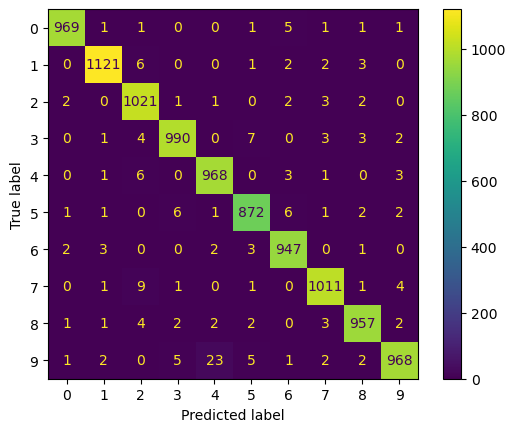

In [ ]:
cm0 = metrics.confusion_matrix(y_test, y_hat0) # evaluación
matriz0 = metrics.ConfusionMatrixDisplay(cm0) # Matriz datos de validación
matriz0.plot()

Como se observa en la matriz de confusión de la red convolucional, las clases que el modelo ha confundido con mayor frecuencia es el digito 9 por un 4, siendo el primer valor el dígito real y el segundo la predicción del modelo, analizando este comportamiento, el cual no se presenta como un problema grave, puede estar causado por similitud en las características de algunos de los dígitos, como por ejemplo los números el 4 y el 9. Para este tipo de redes neuronales clásicas es importante aclarar que realmente no hacen análisis de las características de la imagen, si no que hacen la relación pixel a pixel como si esto fuese una característica única de la imagen, por esa razón la entrada de datos debe ser por medio de un vector de más de 728 características, por lo tanto, los resultados son óptimos ya que las imágenes del dataset no presentan tanto ruido y no difieren en la ubicación de los dígitos, el tamaño, rotación, entre otros detalles. Si a este tipo de modelo se le ingresan imágenes de test donde varíen las características mencionadas anteriormente seguramente realizara predicciones erróneas.

Graficas curva de error y accuracy

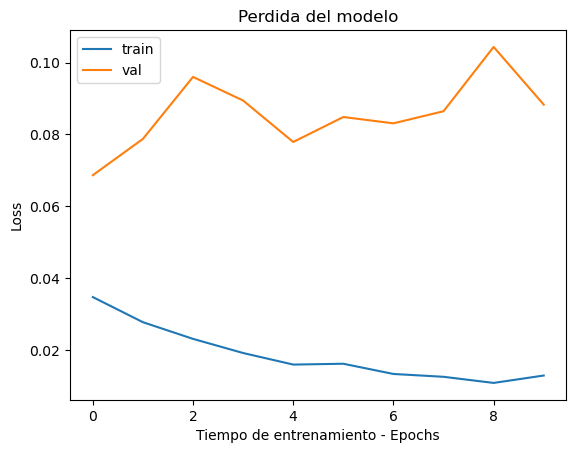

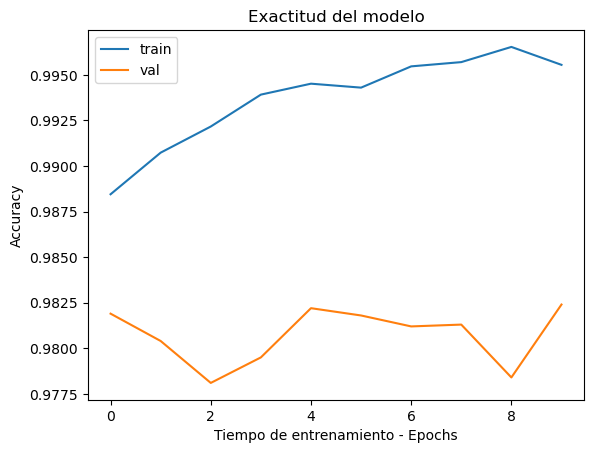

In [ ]:
### Visualización de las curvas de error
plt.plot(modelo6.history['loss'])
plt.plot(modelo6.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo6.history['accuracy'])
plt.plot(modelo6.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

En la gráfica de curva del error se observa un sobreajuste, además se tiene un comportamiento errático en la curva de error del test ya que no tiende a disminuir, para la curva de error de entrenamiento mejoro la métrica, en la curva del accuracy se tiene un comportamiento óptimo para el train y un comportamiento errático para el test, nunca trata de levantarse. Analizando el modelo anterior se observa que aprendió muy bien de los datos de entrenamiento en mayor medida que los modelos anteriores, además no se aleja mucho de los datos de test, por lo que se considera el mejor modelo realizado hasta el momento. Es importante recordar que la escala de los ejes da una noción de sobreajuste que para este caso no necesariamente se está presentando. Sin embargo, se puede realizar una regularización o un dropout en la arquitectura para ver si disminuye este comportamiento. 

# CNN 

Carga nuevamente los datos para adaptarlos a la nueva entrada de la red convolucional, además se confirma la dimensionalidad.

In [ ]:

### Carga de datos 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Se especifica la dimension de las imagenes con el canal (escala de grises)
x_train = x_train.reshape(len(x_train), 28, 28, 1) #De entrada se dan la matriz de cada ejemplo del dataset
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

60000 ejemplos de 28x28 con un solo canal de entrada en esacalas de grises

Estandarización de los datos

In [ ]:

### Estandarización de los datos
x_train2 = x_train/255 # Valores entre 0 y 1
x_test2 = x_test/255
x_train2.shape

(60000, 28, 28, 1)

Se realiza la arquitectura de la red, para la capa convolucional se van a utilizar 32 filtros diferentes (kernels), con un tamaño de kernel de 3x3 con una zancada de 2x2 y se le asigna una activación Relu. Como se puede observar ahora la entrada de esta capa es el tamaño original de los datos (matriz 28x28), esta capa permite capturar características de la imagen.
En este caso la capa de agrupación permite dos elementos importantes, reducir el tamaño de las imágenes en la salida de la capa de convolución y extraer las características más importantes que vienen también de la capa de convolución. Para esta se utiliza el método de maxsampling que toma el máximo pixel de la imagen que se está analizando, lo que rescata las características más importantes, también se pueden utilizar otros métodos como la media, entre otros. La salida de la capa está determinada por el tamaño del kernel y las zancadas. La actividad descrita anteriormente realizada por la capa reduce la dimensionalidad de las imágenes generando una imagen más pixelada pero que contiene características más generales.
Finalmente, se utiliza un flatten para aplanar los datos y se construye una capa oculta con 128 neuronas y activación Relu, además la capa de salida tiene solo 10 neuronas y una activación Softmax.

Inicialmente se van a observar los resultados de la arquitectura de este modelo, en caso de no ser eficiente se empezarán a variar las capas o hiperparámetros.



In [ ]:
### Definición de la arquitectura para la CNN base
model = keras.models.Sequential() #Se crea el objeto

# Definición de la primera capa convolucional
model.add(   
    keras.layers.Conv2D(
        filters = 32, # Cantidad de filtros
        kernel_size = (3,3), # Tamaño de los filtros
        strides = (2,2), # Cantidad de pasos o zancada
        activation = 'relu', # Rectified Linear Unit (ReLU)
        input_shape = (28,28,1) # Tamaño de la imagen
    )
)

# Definición de la capa de agrupación
model.add(
    keras.layers.MaxPooling2D(
        pool_size = (2,2),
        strides = (2,2)
    )
)

# La salida de la capa anterior es un tensor 3D. Se debe conertir a un tensor de 1D
# antes de pasar a las capas densas (Flatten)
model.add(
    keras.layers.Flatten()  
)

# Definición de capa totalemente conectada
model.add(
    keras.layers.Dense(
        units = 128,
        activation = 'relu'
    )
)

# Definición de la capa de salida
model.add(
    keras.layers.Dense(
        units= 10,
        activation = 'softmax'
    )
)

Compilación del modelo

In [ ]:

# Compilación del modelo
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 32)          0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               147584    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 149194 (582.79 KB)
Trainable params: 149194 (582.79 KB)
Non-trainable params: 0 (0.00 Byte)
______________

En este modelo se tiene entrada la capa convolucional, luego la capa de agrupación, una capa oculta y la capa de salida. En el intermedio se realizó el aplanado de los datos. Para la convolucional se estiman 320 parámetros, que está relacionado con la cantidad de filtros definidos y están saliendo 32 imágenes de 13x13 filtradas, en la capa oculta se estiman 147584 y pasan de dimensión 13x13 a 6x6 a través del método aplicado de Maxpooling conservando la misma cantidad de imágenes, luego la capa oculta y finalmente en la capa de salida 1290 parámetros. Se estiman un total de 149194 parámetros, aproximadamente un tercio del modelo anterior, por lo que es menos exigente para la máquina.

Representación esquemática de la arquitectura (no da en vc, se corrio en colab)

In [ ]:
# Representación de la arquitectura
keras.utils.plot_model(
    model,
    to_file = 'model.png',
    show_shapes = True,
    show_layer_names = True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


![imagen estructura.png](<attachment:imagen estructura.png>)
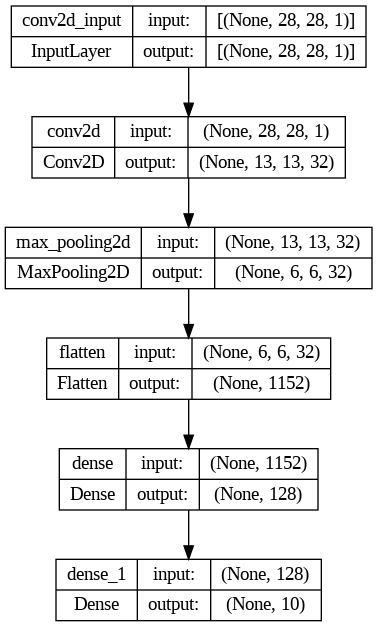

El esquema resume todo lo indicado desde la parte superior donde se describe el modelo.

Entrenamiento de la red, en esta ocasión se esta dividiendo el train para validar primero antes de testear.

In [ ]:
### Entrenamiento de la CNN
history = model.fit(
    x_train2,
    y_train,
    epochs = 10,
    validation_split = 0.2
)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2376 - accuracy: 0.9297 - val_loss: 0.0988 - val_accuracy: 0.9709
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0884 - accuracy: 0.9730 - val_loss: 0.0809 - val_accuracy: 0.9753
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0621 - accuracy: 0.9809 - val_loss: 0.0628 - val_accuracy: 0.9818
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0605 - val_accuracy: 0.9807
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0541 - val_accuracy: 0.9833
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0550 - val_accuracy: 0.9825
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0569 - val_ac

Validando se obtiene un accuracy de 98,49%, este valor sigue siendo para los datos de train.


Evaluación del modelo con los datos de test con el reporte de clasificación 


In [ ]:
### Evaluación del modelo con dataset de test
from sklearn.metrics import classification_report
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

y_hat = np.argmax(model.predict(x_test2), axis = 1) #selecciona el indice con mayor probabilidad

print(classification_report(y_test, y_hat, target_names=class_names))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.93      1.00      0.96      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Analizando el recall para cada clase, nuestra red convolucional es muy buena para predecir todos los números del cero al nueve, en todos los dígitos se obtuvo más del 96%, que serían los números 2 y 8 con este último porcentaje. En la precisión la mayoría de clases están por encima del 98%, menos el digito tres, por lo que se puede concluir que tanto las predicciones acertadas sobre la realidad y sobre el total de predicciones son muy buenas, además se realiza la métrica f1-score la cual es más armónica y en toda las clases está por encima del 96%. En términos generales se tiene una exactitud del 98%. 

Matriz de confusión:

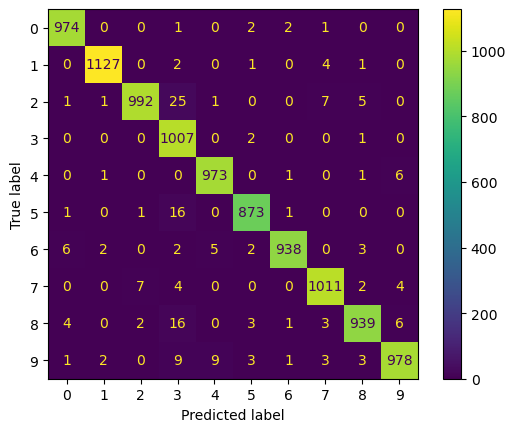

In [ ]:
cm = metrics.confusion_matrix(y_test, y_hat ) # evaluación
matriz = metrics.ConfusionMatrixDisplay(cm) # Matriz datos de validación
matriz.plot()

Como se observa en la matriz de confusión de la red convolucional, las clases que el modelo confundió con mayor frecuencia son las siguientes:  confundir el dígito 2 con el dígito 3, el dígito 5 con el digito 3, el digito 8 con el digito 3, siendo los primeros valores los dígitos reales y los segundos las predicción del modelo, analizando este compartiendo el cual no se presenta como un problema grave, puede ocurrir por similitud en las características de algunos de los dígitos, como por ejemplo los números 8 y 3. 

Errores de la red graficamente

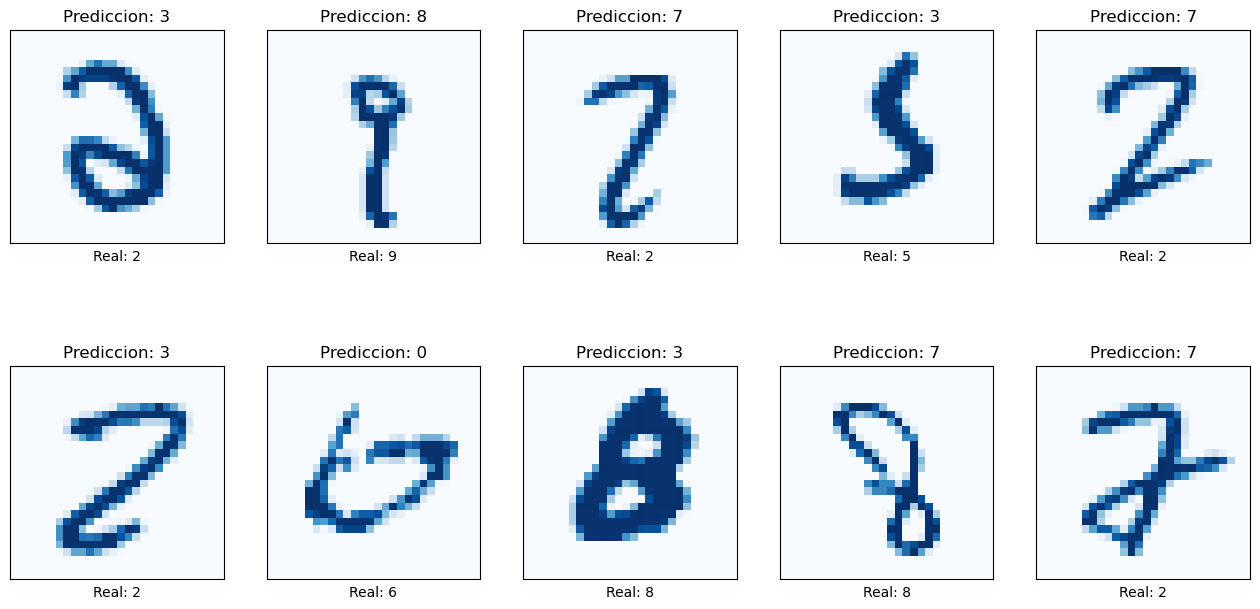

In [ ]:
### Errores en la red neuronal
errors = np.nonzero(y_hat != y_test)[0]
# Visualizar las primeras 10 predicciones erroneas
plt.figure(figsize=(16, 8))
for i, incorrect in enumerate(errors[0:10]):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[incorrect].reshape(28,28), cmap = 'Blues')
    plt.title("Prediccion: {}".format(class_names[y_hat[incorrect]]))
    plt.xlabel("Real: {}".format(class_names[y_test[incorrect]]))

Agregando al análisis de la matriz de confusión se puede observar como en la fila 1 y la columna 1 la predicción es un 3 y el valor real es un 2, algunas características todavía no han sido totalmente aprendidas por la red o también como en este caso la imagen presenta ruido y modificaciones del número muy marcadas, lo cual puede confundir fácilmente el modelo y hasta al ser humano el digito que está definido en la imagen. 



Curva de error y accuracy

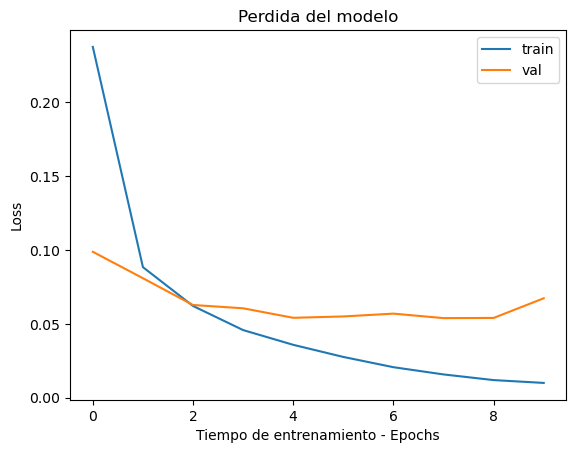

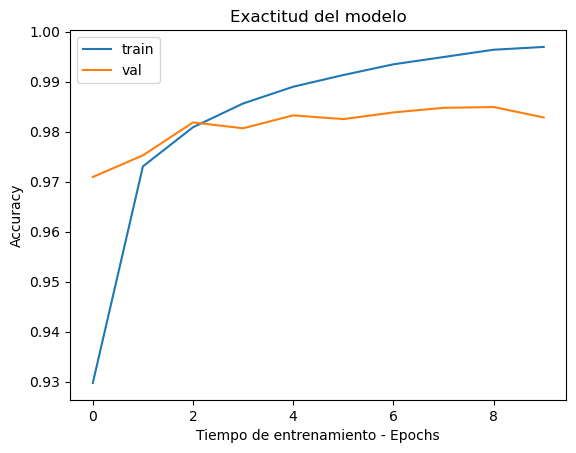

In [ ]:
### Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

En la curva de error para los datos de entrenamiento se observa un comportamiento óptimo, donde a partir del epoch 8 se puede estar estabilizando el error. Para la validación la curva nunca mejora y se queda estancada en el mismo nivel. Para el accuracy ambas curvas tienden a crecer, la de train en mayor grado que la de validación, y en el epoch 8 ambas también se estabilizan. No se observa un sobreajuste que pueda afectar el rendimiento del modelo, sin embargo, se recomienda realizar alguna técnica de regularización o el dropout para comparar resultados.

# Resultados y conlusiones

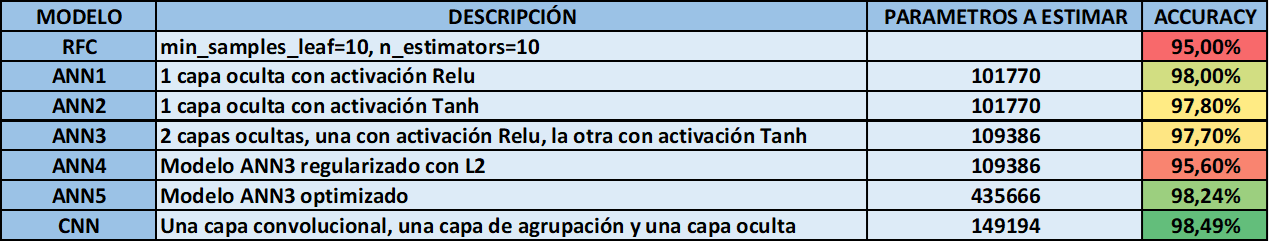

Las redes neuronales clásicas construidas ANN1, ANN2 Y ANN3 son redes de una construcción sencilla que tienen alrededor de 100000 parámetros estimados y que en general presentaron un accuracy muy parecido, 98%, 97% y 97% respectivamente. Como se observa entre las dos primeras redes el variar el tipo de activación dejando el resto de parámetros iguales no afecto considerablemente el rendimiento de los modelos, además la tercera red que aumentaba otra capa oculta y que mezclaba las dos activaciones no obtuvo mejora, solo aumento la capacidad computacional. Por último, los tres modelos presentaron indicios de sobreajuste.

La regularización L2 de la red neuronal ANN3 (red ANN4) desmejoró los resultados obtenidos por el modelo sin regularizar, además de los modelos anteriores simples, sin embargo, cerró la brecha entre el train y el test logrando disminuir en gran medida el sobreajuste presentado, por lo que se concluye que la regularización controló que la red no aprendiera demasiado de los datos para lograr una mejor generalización de los datos, por esta razón se desmejoraron las métricas, y por lo tanto, no se obtuvo sobreajuste.

La optimización de la red neuronal ANN3 (red ANN5) optimizó eficientemente en 6 trial los hyperparametros para la red, donde se halló las neuronas de las dos capas ocultas y el learning rate. Cabe anotar que se realizaron pocas corridas de la grilla debido al tiempo que tomaba buscar estos hyperparametros, por lo que se recomienda aumentar las corridas. Es importante mencionar que este modelo generó 435666 parámetros a estimar, ubicándose en el modelo con mayor número de parámetros, triplicado el CNN y cuatriplicando todos los modelos ANN anteriores, por lo que es una red neuronal más profunda que requiere mayor nivel computacional. En esta red se obtuvo un accuracy del 98,24%, dejando todos los modelos anteriores en el camino.

El modelo de shallow learning, el random forest classifier, obtuvo un accuracy del 95%, demostrando que este tipo de problemas se pueden realizar con modelos clásicos y con hyperparametros sencillos, además este tipo de modelos requieren una capacidad computacional mucho menor que las redes neuronales.

Todos los modelos anteriores incluyendo el random forest y los modelos de ANN sufren de ausencia de estructura espacial, es decir no buscan relaciones entre pixeles vecinos en las imágenes, por lo tanto, dejan en el camino patrones y características de estas, que son cruciales para la identificación de los dígitos. Por las circunstancias anteriores, cualquier cambio, rotación, deformidad, traslado en el dígito afecta drásticamente el rendimiento de la red, de aquí nace utilizar la red convolucional a continuación. Finalmente, el rendimiento en validación es alto ya que las imágenes no difieren en gran magnitud entre sí.

La red convolucional por medio de sus nuevas capas permitió un rendimiento mayor que al resto de modelos con accuracy del 98,49%, logrando capturar patrones y características únicas de los dígitos, además como se expuso en la presentación del modelo existen todavía fallas o dígitos que el modelo no es capaz de reconocer, sin embargo, optimizando esta red se podrían encontrar resultados mucho mejores. Esta red además del valor agregado mencionado anteriormente solo estimo 149194 parámetro, que a comparación del ANN5 es un tercio de sus parámetros, por lo tanto, este modelo requiere de menos capacidad computacional.

Las entregas con este modelo, que presenta un accuracy de un 98,49%, se consideran mucho más precisas y eficientes a la hora de generar la clasificación de los paquetes, puesto que al ser una red neuronal convolucional aprende de mejor manera a reconocer las características claves que pueden tener los números escritos por los clientes, los cuales suelen presentar diferencias significativas en tamaños y forma, dicha red absorbe mejor esas diferencias, y por lo tanto, otorgaron unas mejores métricas con respecto a las otras redes. 

El trabajo que actualmente realizan los operarios, según cálculos realizados otorga un error del 95% a la hora de la clasificación de los paquetes, puesto que distracciones en su entorno suelen ser muy comunes. Se recomienda a la empresa adquirir dicha tecnología si quiere mejorar considerablemente estos errores y reducir sus costos. A su vez, los tiempos se reducirían enormemente ya que esta automatización va a permitir realizar el trabajo con una velocidad muy superior a la actual y con un error muy mínimo, según se pudo observar en el entrenamiento del respectivo modelo. 

Finalmente, se recomienda realizar más iteraciones con más cambios en los modelos y comparar con los resultados obtenidos.

